<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Load and Prepare Data

In [2]:
google_df = pd.read_csv("googleplaystore.csv")


## EDA

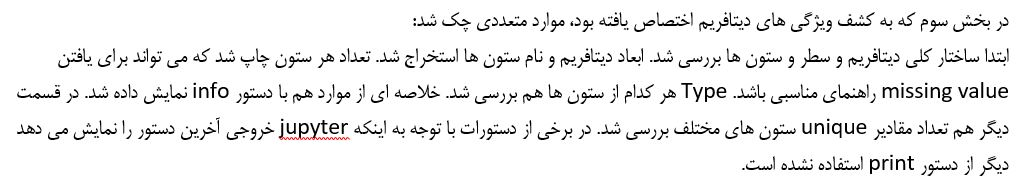

In [3]:
google_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
print(google_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [5]:
print(google_df.shape)

(10841, 13)


In [6]:
print(google_df.describe)

<bound method NDFrame.describe of                                                      App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                             Parkinson Exercices FR  ...          2.2 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  V

In [7]:
google_df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [8]:
google_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# check uniq value of some columns
#print(google_df["Installs"].value_counts())

print(google_df["Type"].value_counts())


Free    10039
Paid      800
0           1
Name: Type, dtype: int64


In [11]:
print(google_df["Installs"].value_counts())

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64


In [12]:
print(google_df.groupby("Type")["Installs"].value_counts())

Type  Installs      
0     Free                 1
Free  1,000,000+        1555
      10,000,000+       1249
      100,000+          1079
      10,000+            925
      1,000+             758
      5,000,000+         752
      100+               623
      500,000+           527
      50,000+            436
      5,000+             410
      100,000,000+       409
      10+                316
      500+               290
      50,000,000+        289
      50+                171
      500,000,000+        72
      5+                  70
      1,000,000,000+      58
      1+                  46
      0+                   4
Paid  1,000+             149
      10,000+            129
      100+                96
      100,000+            90
      10+                 70
      5,000+              67
      50,000+             43
      500+                40
      50+                 34
      1,000,000+          24
      1+                  21
      5+                  12
      500,000+        

## Data Preprocessing

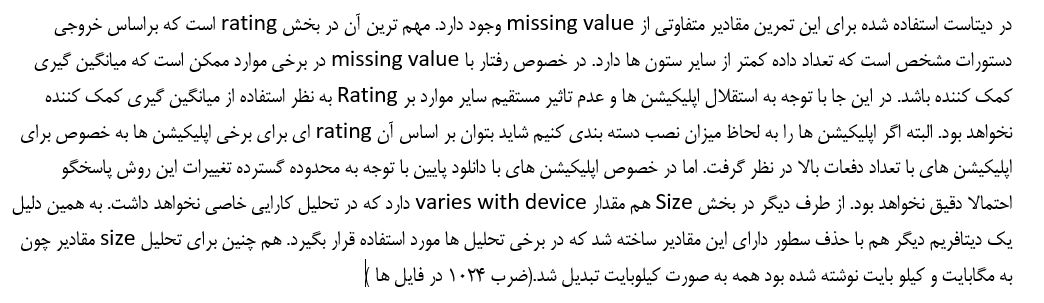

In [13]:
#finding missing value/finding which columns have missing values
google_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
#drop missing value
google_df.dropna(inplace=True)

In [15]:
#after dropping missing value
google_df.count()

App               9360
Category          9360
Rating            9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

In [17]:
## create new df with modified size
google_df_size = google_df.drop(google_df[google_df["Size"]=='Varies with device'].index)
google_df_size.shape

(7723, 13)

In [18]:
#change Installs columns value to numeric value
google_df["Installs"] = google_df["Installs"].str.replace('+', '', regex=True).replace(',','',regex=True).astype(int)
print(google_df["Installs"].head())


0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64


In [87]:
#modifying size coulumn value based on mega or kilo
google_df_size = google_df.copy()
size_list = []
for size in google_df_size["Size"]:
  if 'M' in size:
#    print(size)
    new_size = float(size.replace("M",""))
    new_size = new_size * 1024
  elif 'k' in size:
    new_size = float(size.replace('k',''))
  size_list.append(new_size)
google_df_size["Size_new"] = size_list


In [21]:
print(google_df_size["Size_new"].head(10))

0     19456
1     14336
2    8908.8
3     25600
4    2867.2
5    5734.4
6     19456
7     29696
8     33792
9    3174.4
Name: Size_new, dtype: object


In [85]:
google_df_size.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19456
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14336
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25600
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2867.2


In [23]:
## change Reviews column to numeric
google_df['Reviews'] = google_df['Reviews'].astype(int)

## Strorytelling - Visualization

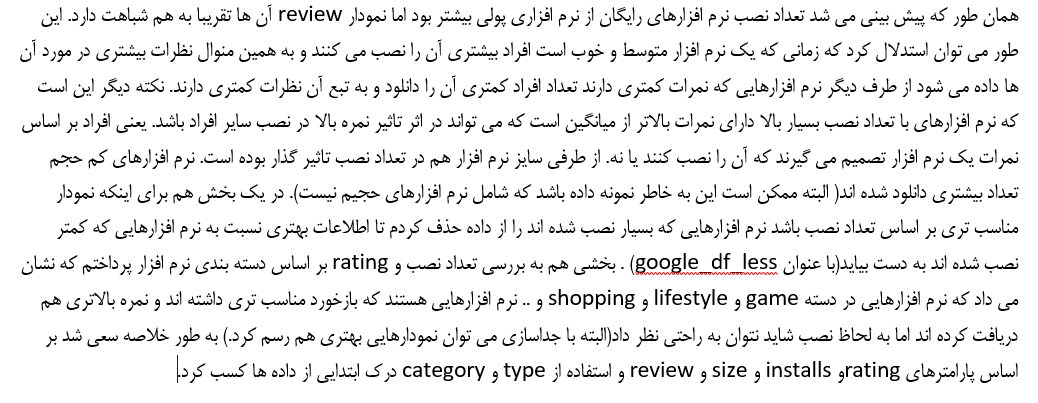

google_df 

google_df_size : change size to numeric

In [24]:
print(google_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


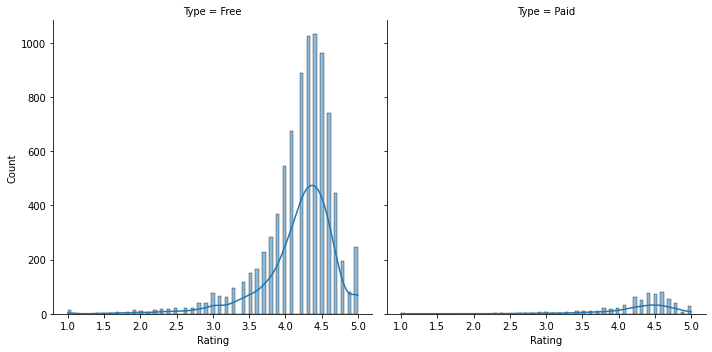

In [25]:
sns.displot(data=google_df, x="Rating", col="Type", kde=True)

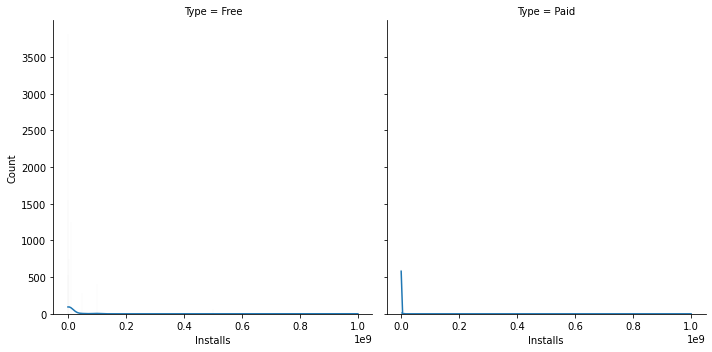

In [80]:
sns.displot(data=google_df, x="Installs", col="Type", kde=True)

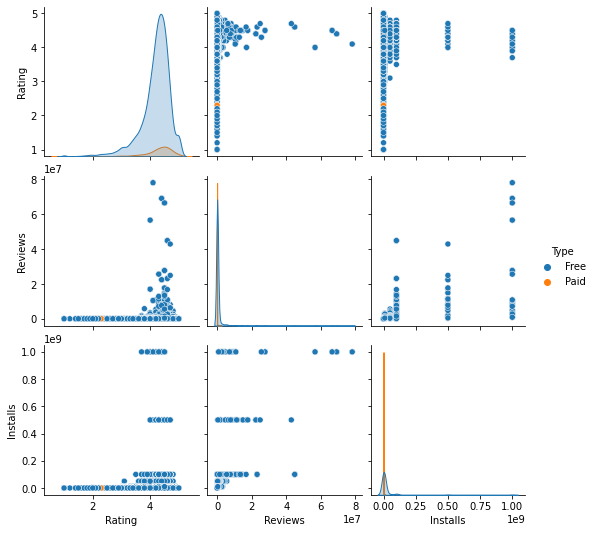

In [83]:
sns.pairplot(data=google_df, hue="Type")

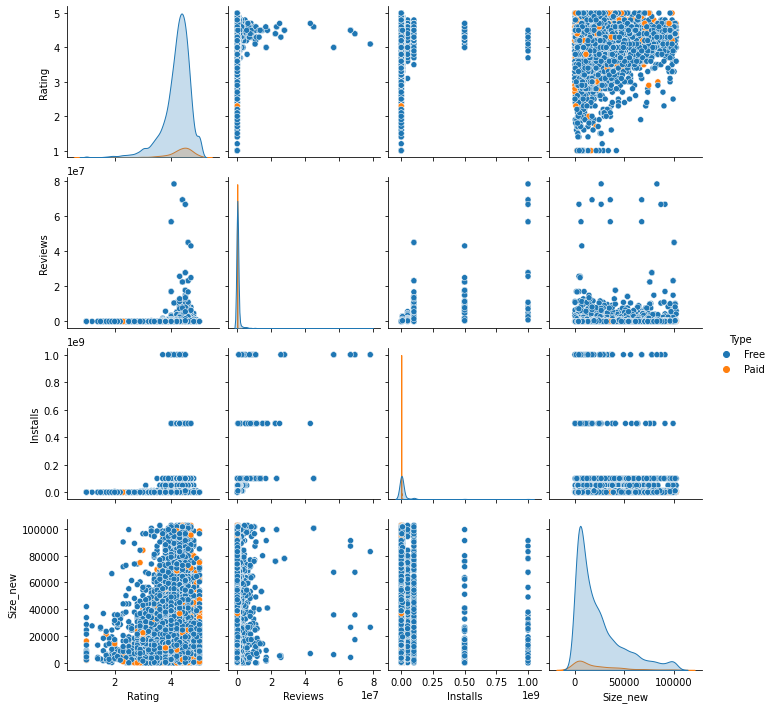

In [88]:
sns.pairplot(data=google_df_size, hue="Type")

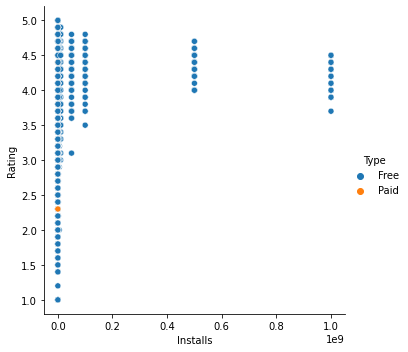

In [82]:
sns.relplot(
    data=google_df,
    x="Installs", y="Rating", hue="Type"
)

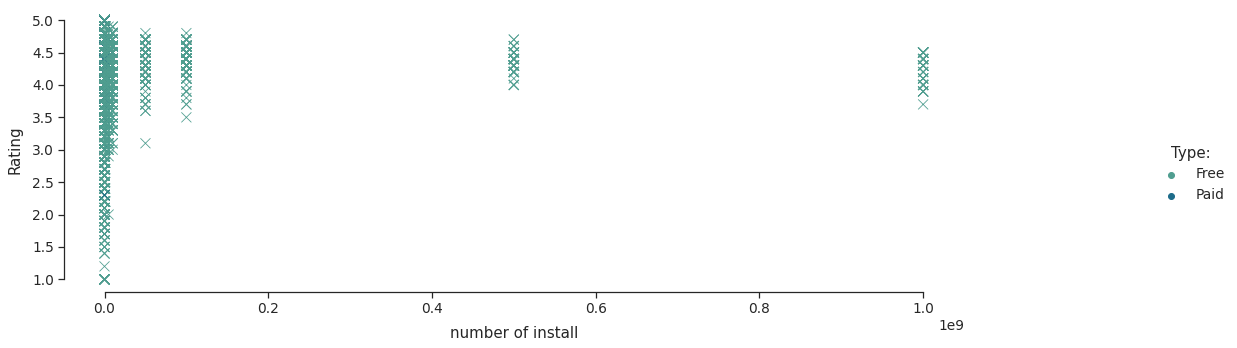

In [91]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=google_df,
    x="Installs", y="Rating", hue="Type",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("number of install", "Rating", labelpad=10)
g.legend.set_title("Type:")
g.figure.set_size_inches(20, 5)
#g.ax.margins(.15)
g.despine(trim=True)

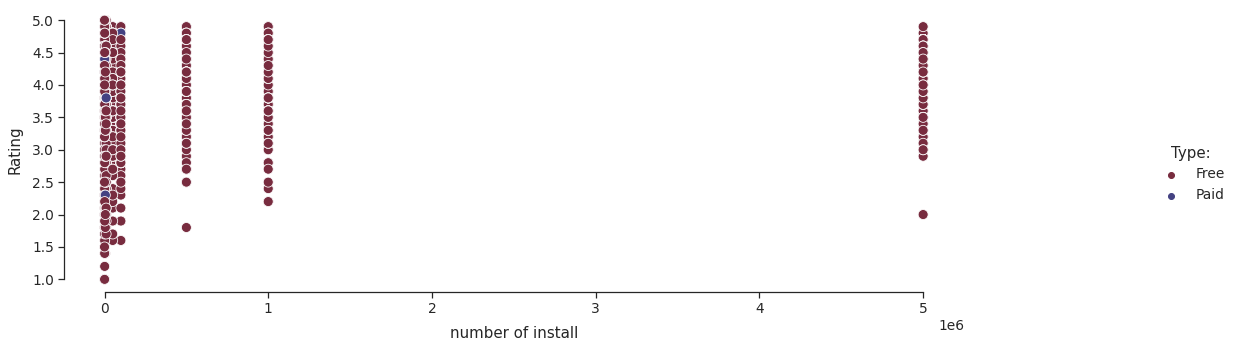

In [92]:
google_df_less = google_df[google_df["Installs"] < 10000000]

sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=google_df_less,
    x="Installs", y="Rating", hue="Type",
    palette="icefire_r", marker="o", s=100,
)
g.set_axis_labels("number of install", "Rating", labelpad=10)
g.legend.set_title("Type:")
g.figure.set_size_inches(20, 5)
#g.ax.margins(.15)
g.despine(trim=True)

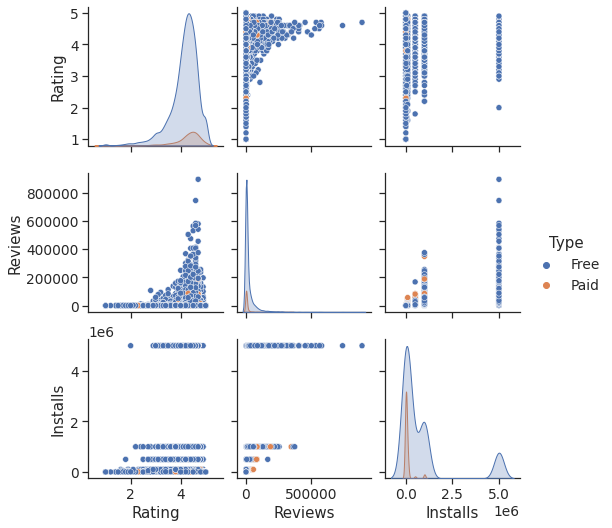

In [93]:
sns.pairplot(data=google_df_less, hue="Type")

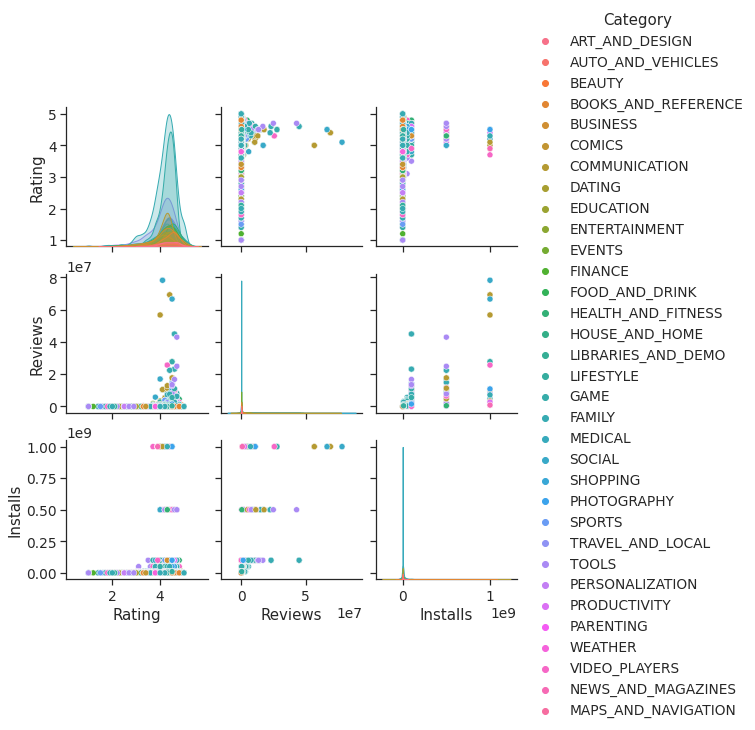

In [94]:
sns.pairplot(data=google_df, hue="Category")

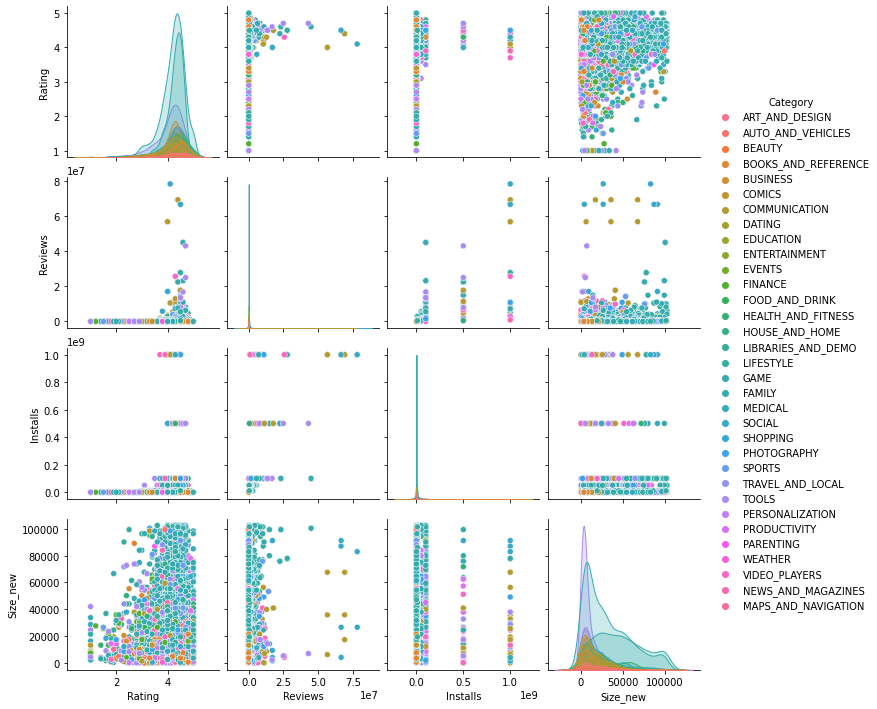

In [90]:
sns.pairplot(data=google_df_size, hue="Category")

## Send us the Result (Maktabkhoone)